In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [14]:
num_of_clusters=4
dataset = pd.read_csv("A2Q1.csv",header=None)
dataset=np.array(dataset)
N,D=dataset.shape

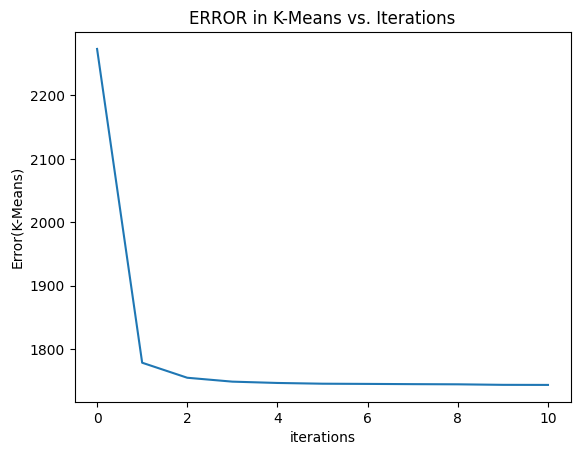

In [15]:

error_function=[]
current_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
Next_cluster_assignement= np.zeros((dataset.shape[0])).astype(int)
current_cluster_assignement=np.random.randint(0,num_of_clusters,dataset.shape[0])
#print(current_cluster_assignement)
mean_of_clusters=np.zeros((num_of_clusters,D))
for i in range(num_of_clusters) :
    temp=0
    for j in range(dataset.shape[0]) :
     if current_cluster_assignement[j]==i :
        temp+=1
        #print(temp)
        mean_of_clusters[i]+=dataset[j]
    if temp==0 :print(temp)    
    mean_of_clusters[i]/= temp    
while True :
    error_temp =0
    
    for i in range(dataset.shape[0]) :
     t=current_cluster_assignement[i]
     error_temp+=np.linalg.norm(dataset[i]-mean_of_clusters[t])**2
        
     Next_cluster_assignement[i]=np.argmin([np.linalg.norm(dataset[i]-mean_of_clusters[j]) for j in range(num_of_clusters)])
    error_function.append(error_temp)
    if  np.array_equal(Next_cluster_assignement,current_cluster_assignement):
     break

    current_cluster_assignement = Next_cluster_assignement.copy()
    mean_of_clusters=np.zeros((num_of_clusters,D))
    for i in range(num_of_clusters) :
        temp=0
        for j in range(dataset.shape[0]) :
            if current_cluster_assignement[j]==i :
             temp+=1
             #print(temp)
             mean_of_clusters[i]+=dataset[j]
        mean_of_clusters[i]/= temp

colors =plt.cm.tab10(np.linspace(0,1,num_of_clusters))
plt.plot(range(len(error_function)),error_function)
plt.xlabel("iterations")
plt.ylabel("Error(K-Means)")
plt.title("ERROR in K-Means vs. Iterations")
plt.show()